In [1]:
pip install --upgrade google-cloud-speech

Note: you may need to restart the kernel to use updated packages.


In [1]:
#speech to text
gcs_uri="gs://depression1223/Depression voice (interview) copy (online-audio-converter.com).wav"

from google.cloud import speech

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="depression1223-472ba50659e4.json"

client = speech.SpeechClient()

audio = speech.RecognitionAudio(uri=gcs_uri)
config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=48000,
    language_code="en-US",
)

operation = client.long_running_recognize(config=config, audio=audio)

print("Waiting for operation to complete...")
response = operation.result(timeout=90)

#print(response)

# Each result is for a consecutive portion of the audio. Iterate through
# them to get the transcripts for the entire audio file.
###自然言語データを全部繋げたデータをtext_allにぶち込んだver

text_all = ""
for result in response.results:
    text = result.alternatives[0].transcript
    text_all += text
    
print(text_all)

Waiting for operation to complete...
what kind of started just finding a bit low and about things but I don't know I just recently I'd be bothered to do anything that's what that kind of find it hard to get motivated for things and I want to be I really want to be bad as that it's just kind of reaching the head now I just want to do something about it yeah I mean that lovely I do with them that I don't know I recently whenever they want to go out with stuff like I don't want to bring them down, they don't understand what I'm going to be kind of I did I didn't make fun of how I feel it really understand what it's like I just I don't want to go out with them and bring them down I guess I kind of started when I was at you when I was revising to my exams and I guess sister I put myself I think I've always wanted to do well for me and I guess my parents said the stress of exams and it was kind of hot cuz my parents because her a tablet Island okay maybe more than other people but my parents

In [3]:
pip install liwc

Note: you may need to restart the kernel to use updated packages.


In [4]:
import liwc
parse, category_names = liwc.load_token_parser('3 dimension.dic')
import re

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

###gettysburgには診断したい自然言語データが入る
gettysburg = text_all.lower()
gettysburg_tokens = tokenize(gettysburg)


from collections import Counter
sum = len(gettysburg.split())
gettysburg_counts = Counter(category for token in gettysburg_tokens for category in parse(token))
###print(gettysburg_counts)


###読みやすいように改造
i = gettysburg_counts["i"]/sum
negative_emotion = gettysburg_counts["negative emotion"]/sum
absolutist_words = gettysburg_counts["absolutist words"]/sum

#print("I : " + str(round(i*100,2)) + "%")
#print("Negative emotion : " + str(round(negative_emotion*100,2)) + "%")
#print("Absolutist words : " + str(round(absolutist_words*100,2)) + "%")

In [5]:
pip install mutagen

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mutagen.wave import WAVE
  
# function to convert the information into 
# some readable format
def audio_duration(length):
    mins = length/60

  
    return mins  # returns the duration

# Create a WAVE object
# Specify the directory address of your wavpack file
# "alarm.wav" is the name of the audiofile
audio = WAVE("Depression voice (interview) copy (online-audio-converter.com).wav")
  
# contains all the metadata about the wavpack file
audio_info = audio.info
length = int(audio_info.length)
mins = audio_duration(length)
#print('Total Duration:{}'.format(mins))

###分単位に書き直した

In [7]:
!pip install numpy
!pip install librosa
!pip install matplotlib
!pip install scipy 

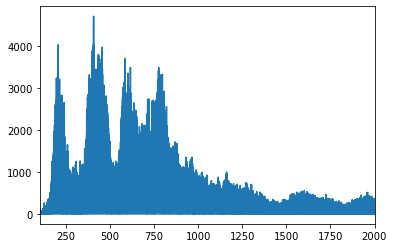

In [8]:
###音声データをフーリエ変換してグラフにする

import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
 
 
#音声ファイル読み込み
args = sys.argv
wav_filename = args[1]
rate, data = scipy.io.wavfile.read("Depression voice (interview) copy (online-audio-converter.com).wav")
 
 
#（振幅）の配列を作成
data = data / 32768
 
##### 周波数成分を表示する #####
#縦軸：dataを高速フーリエ変換する（時間領域から周波数領域に変換する）
fft_data = np.abs(np.fft.fft(data))    
#横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate)  
#データプロット
plt.plot(freqList, fft_data)
plt.xlim(100, 2000) #声の周波数である0～2000Hzまで表示
plt.show()

In [9]:
#フーリエ変換後の縦軸の標準偏差を算出したい

#声の周波数である0～2000Hzの部分だけを計算したい
fl = 100                            # 低域カットオフ周波数
fh = 2000                           # 高域カットオフ周波数
df = freqList[1]                    # 周波数分解能(freqListという横軸を持ってくる)(分解能とはどれだけ細かくデータを検出するかみたいな)
fl_i = int(fl / df)                 # flの指標(Numpyスライス用）
fh_i = int(fh / df)                 # fhの指標(Numpyスライス用）
extracted = fft_data[fl_i:fh_i]     # FFT波形の振幅からデータを抽出(リスト[開始インデックス:終了インデックス]は基本)


mean = np.mean(extracted)           # 平均を計算
std = np.std(extracted, ddof=1)     # 不偏標準偏差
#print('Mean=', mean)
#print('σ=', std)

#fft_dataはフーリエ変換後のグラフの縦軸
#標準偏差により平均からどれくらいバラツキがあるかを調べられる(周波数毎のpowerにばらつきが大きい=>周波数が安定していない=>抑揚ある)


#確認用
max = np.max(extracted)
#print(max)
min = np.min(extracted)
#print(min)
mid = np.median(extracted)
#print(mid)
mean = np.mean(extracted)
#print(mean)

In [10]:
print("I : " + str(round(i*100,2)) + "%")
print("Negative emotion : " + str(round(negative_emotion*100,2)) + "%")
print("Absolutist words : " + str(round(absolutist_words*100,2)) + "%")
print("WPM : " + str(round(sum/mins,2)))
print('Monotone Voice : ' + str(round(std,2)))

I : 12.47%
Negative emotion : 2.01%
Absolutist words : 0.8%
WPM : 144.76
Monotone Voice : 422.99
